In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

In [2]:
Data = pd.read_csv('Electric_Vehicle.csv')
Data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,KM8K33AGXL,King,Seattle,WA,98103.0,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,258,0,43.0,249675142,POINT (-122.34301 47.659185),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,1C4RJYB61N,King,Bothell,WA,98011.0,2022,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,1.0,233928502,POINT (-122.20578 47.762405),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
2,1C4RJYD61P,Yakima,Yakima,WA,98908.0,2023,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,14.0,229675939,POINT (-120.6027202 46.5965625),PACIFICORP,5.307700e+10
3,5YJ3E1EA7J,King,Kirkland,WA,98034.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,45.0,104714466,POINT (-122.209285 47.71124),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
4,WBY7Z8C5XJ,Thurston,Olympia,WA,98501.0,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,97,0,22.0,185498386,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC,5.306701e+10


In [4]:
Data.tail()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
150477,WBY43AW05P,Grays Harbor,Montesano,WA,98563.0,2023,BMW,I4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,19.0,251204075,POINT (-123.60535 46.982215),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF G...,5.302700e+10
150478,5YJ3E1EB7P,King,Seattle,WA,98104.0,2023,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,43.0,241344414,POINT (-122.329075 47.6018),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
150479,5YJYGDEEXM,King,Seattle,WA,98109.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,43.0,180705626,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
150480,5UXTA6C08P,Snohomish,Mountlake Terrace,WA,98043.0,2023,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,0,1.0,240473950,POINT (-122.30842 47.78416),PUGET SOUND ENERGY INC,5.306105e+10
150481,7SAYGDEF8N,Skagit,Mount Vernon,WA,98273.0,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,40.0,207667589,POINT (-122.338975 48.41333),PUGET SOUND ENERGY INC,5.305795e+10


In [5]:

Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150482 entries, 0 to 150481
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         150482 non-null  object 
 1   County                                             150479 non-null  object 
 2   City                                               150479 non-null  object 
 3   State                                              150482 non-null  object 
 4   Postal Code                                        150479 non-null  float64
 5   Model Year                                         150482 non-null  int64  
 6   Make                                               150482 non-null  object 
 7   Model                                              150482 non-null  object 
 8   Electric Vehicle Type                              150482 non-null  object

In [6]:
Data.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,150479.000000,150482.000000,150482.000000,150482.000000,150141.000000,1.504820e+05,1.504790e+05
mean,98168.344154,2020.005436,67.877839,1312.644735,29.343950,2.111122e+08,5.297195e+10
std,2473.612184,3.015209,96.230009,9231.310215,14.824829,8.196388e+07,1.638841e+09
min,1730.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,1.081042e+09
25%,98052.000000,2018.000000,0.000000,0.000000,18.000000,1.693473e+08,5.303301e+10
50%,98122.000000,2021.000000,18.000000,0.000000,33.000000,2.150306e+08,5.303303e+10
75%,98370.000000,2023.000000,97.000000,0.000000,43.000000,2.399119e+08,5.305307e+10
max,99577.000000,2024.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


In [7]:

Data.isnull().sum()

VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 341
DOL Vehicle ID                                         0
Vehicle Location                                       7
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64

In [8]:
Data_1 = Data.dropna()
print(Data_1)

        VIN (1-10)        County               City State  Postal Code  \
0       KM8K33AGXL          King            Seattle    WA      98103.0   
1       1C4RJYB61N          King            Bothell    WA      98011.0   
2       1C4RJYD61P        Yakima             Yakima    WA      98908.0   
3       5YJ3E1EA7J          King           Kirkland    WA      98034.0   
4       WBY7Z8C5XJ      Thurston            Olympia    WA      98501.0   
...            ...           ...                ...   ...          ...   
150477  WBY43AW05P  Grays Harbor          Montesano    WA      98563.0   
150478  5YJ3E1EB7P          King            Seattle    WA      98104.0   
150479  5YJYGDEEXM          King            Seattle    WA      98109.0   
150480  5UXTA6C08P     Snohomish  Mountlake Terrace    WA      98043.0   
150481  7SAYGDEF8N        Skagit       Mount Vernon    WA      98273.0   

        Model Year     Make           Model  \
0             2020  HYUNDAI            KONA   
1             202

C:\Users\thamim\AppData\Local\Temp\ipykernel_12456\4030854167.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= Data_model_year.index, y = Data_model_year.values, palette="plasma")


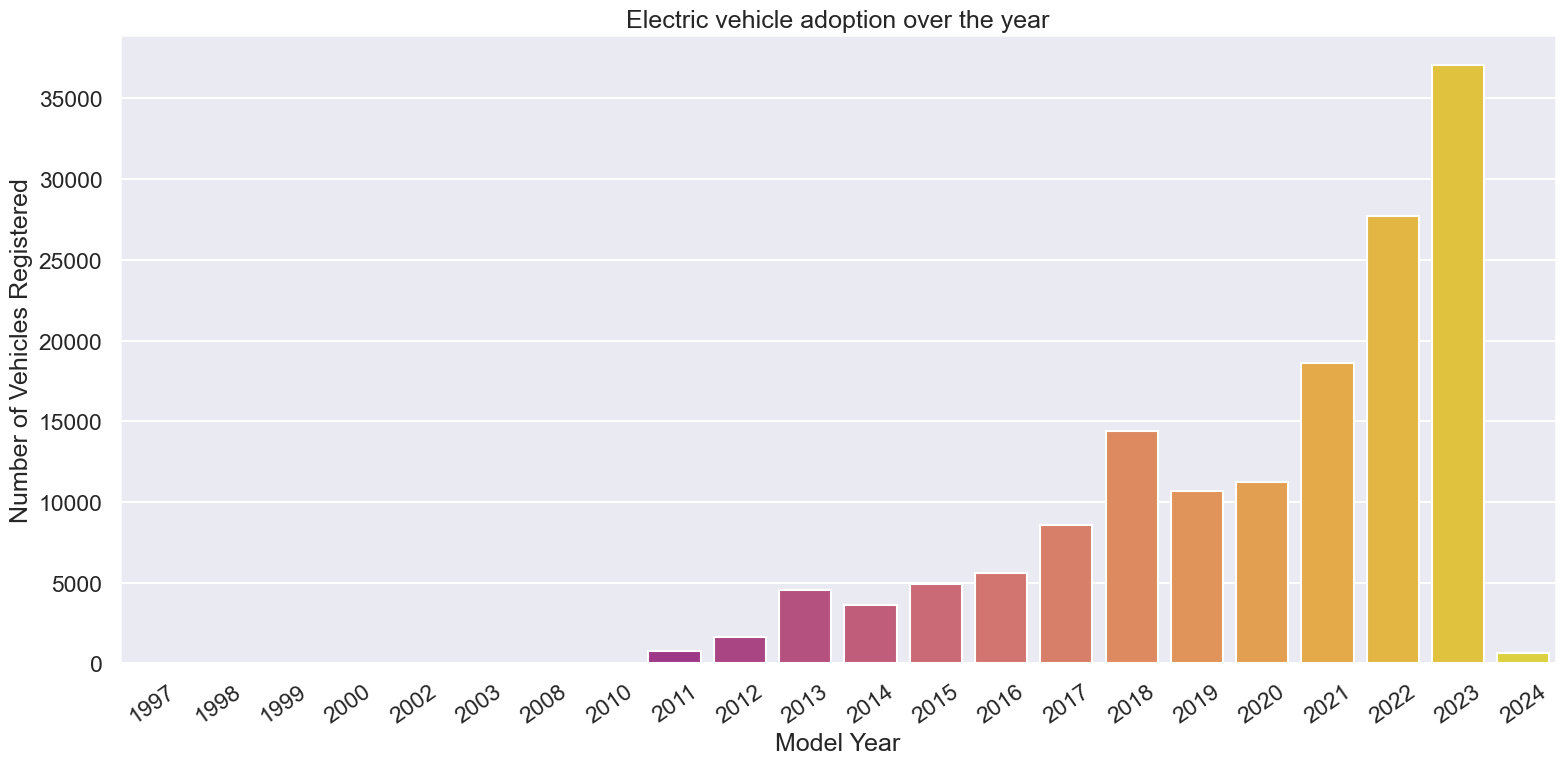

In [20]:
# Electric vehicle registered over the model year
sns.set_theme('talk')
sns.set_style('darkgrid')
plt.figure(figsize=(16,8))
Data_model_year = Data_1['Model Year'].value_counts().sort_index()
sns.barplot(x= Data_model_year.index, y = Data_model_year.values, palette="plasma")
plt.title('Electric vehicle adoption over the year')
plt.ylabel('Number of Vehicles Registered')
plt.xticks(rotation=35)
plt.tight_layout()
plt.show()

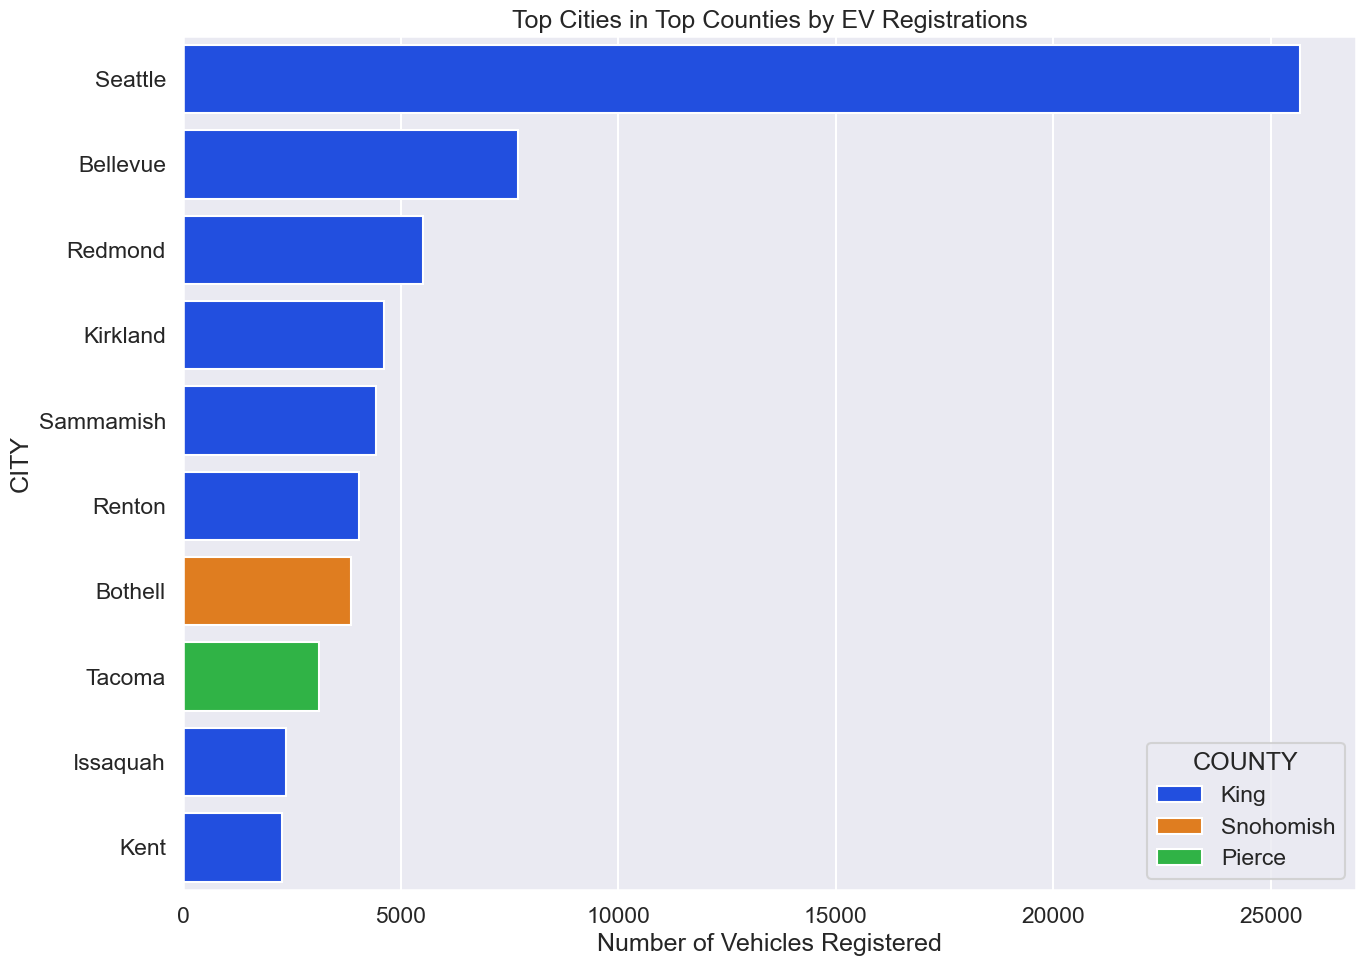

In [10]:
# geographical distribution at county level
Data_county_distribution = Data_1['County'].value_counts()
top_counties = Data_county_distribution.head(3).index

# filtering the dataset for these top counties
top_counties_data = Data_1[Data_1['County'].isin(top_counties)]

# analyzing the distribution of EVs within the cities of these top counties
EV_city_distribution_top_counties = top_counties_data.groupby(['County', 'City']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

# visualize the top 10 cities across these counties
top_cities = EV_city_distribution_top_counties.head(10)

plt.figure(figsize=(14, 10))
sns.barplot(x='Number of Vehicles', y='City', hue='County', data=top_cities, palette="bright")
plt.title('Top Cities in Top Counties by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('CITY')
plt.legend(title='COUNTY')
plt.tight_layout()
plt.show()

C:\Users\thamim\AppData\Local\Temp\ipykernel_22876\3127500729.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=EV_type_distribution.values, y=EV_type_distribution.index, palette="rocket")


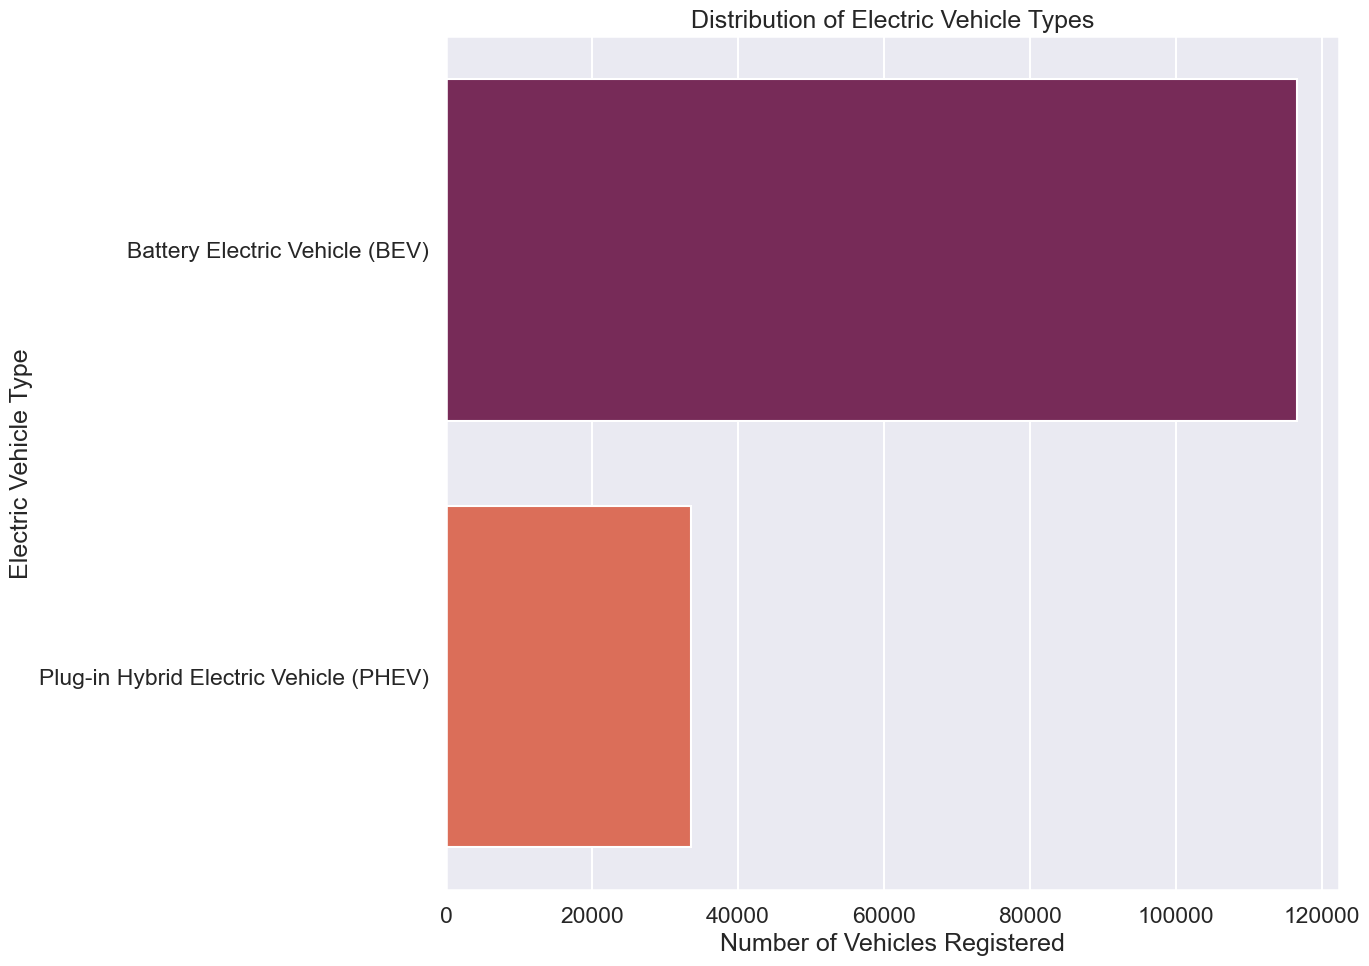

In [11]:
# analyzing the distribution of electric vehicle Types
EV_type_distribution = Data_1['Electric Vehicle Type'].value_counts()

plt.figure(figsize=(14, 10))
sns.barplot(x=EV_type_distribution.values, y=EV_type_distribution.index, palette="rocket")
plt.title('Distribution of Electric Vehicle Types')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Electric Vehicle Type')
plt.tight_layout()
plt.show()

C:\Users\thamim\AppData\Local\Temp\ipykernel_22876\3071752861.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Ev_make_distribution_1.values, y=Ev_make_distribution_1.index, palette="husl")


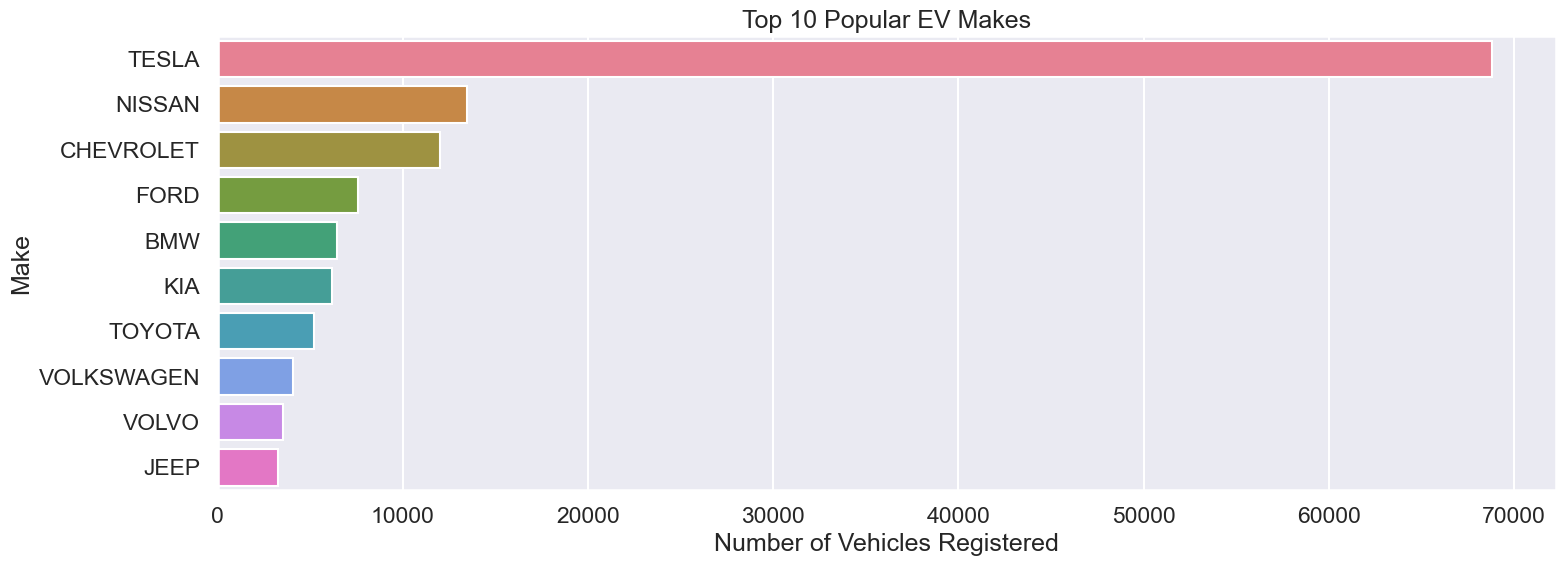

In [12]:
# analyzing the popularity of EV manufacturers
Ev_make_distribution = Data_1['Make'].value_counts()
Ev_make_distribution_1 = Ev_make_distribution.head(10) 

plt.figure(figsize=(16, 6))
sns.barplot(x=Ev_make_distribution_1.values, y=Ev_make_distribution_1.index, palette="husl")
plt.title('Top 10 Popular EV Makes')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Make')
plt.tight_layout()
plt.show()

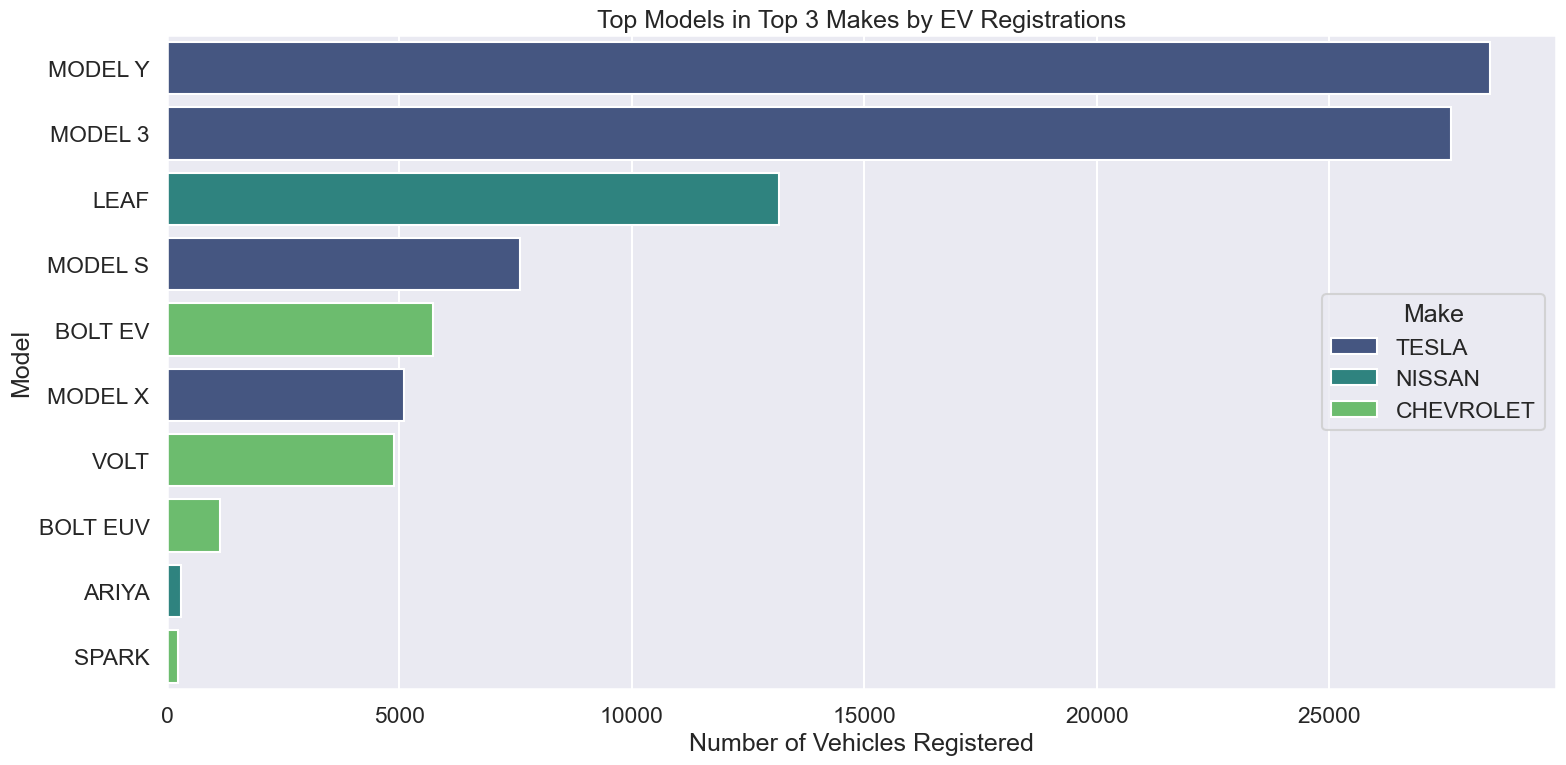

In [13]:
# selecting the top 3 manufacturers based on the number of vehicles registered
top_3_makes = Ev_make_distribution_1.head(3).index

# filtering the dataset for these top manufacturers
top_makes_data = Data_1[Data_1['Make'].isin(top_3_makes)]

# analyzing the popularity of EV models within these top manufacturers
ev_model_distribution_top_makes = top_makes_data.groupby(['Make', 'Model']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

# visualizing the top 10 models across these manufacturers for clarity
top_models = ev_model_distribution_top_makes.head(10)

plt.figure(figsize=(16, 8))
sns.barplot(x='Number of Vehicles', y='Model', hue='Make', data=top_models, palette="viridis")
plt.title('Top Models in Top 3 Makes by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')
plt.tight_layout()
plt.show()

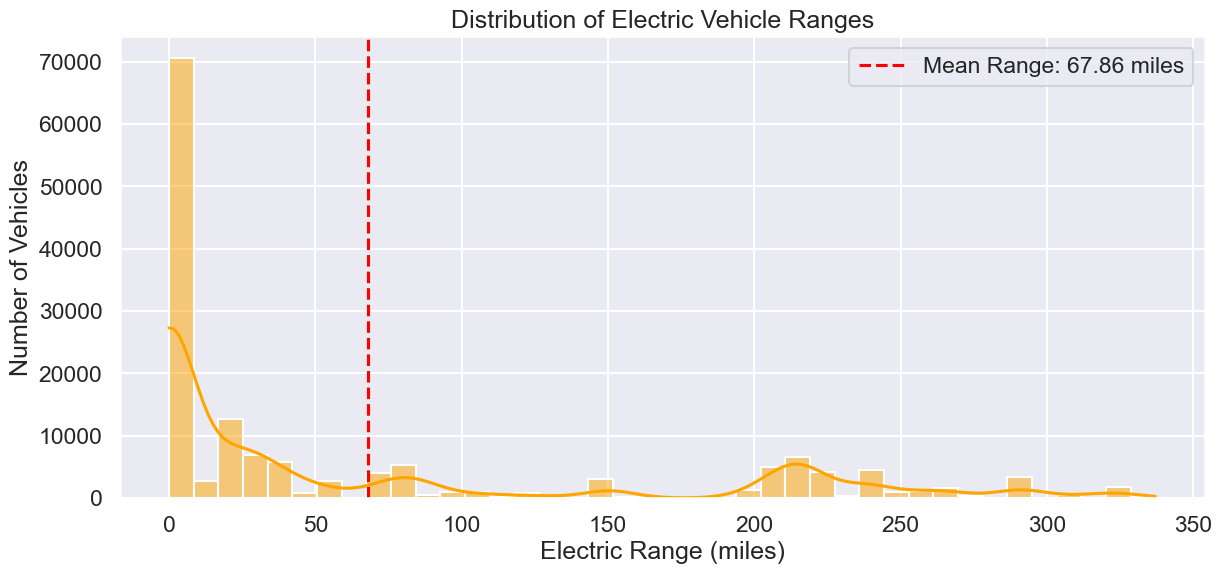

In [14]:
# analyzing the distribution of electric range
plt.figure(figsize=(14, 6))
sns.histplot(Data_1['Electric Range'], bins=40, kde=True, color='orange')
plt.title('Distribution of Electric Vehicle Ranges')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Number of Vehicles')
plt.axvline(Data_1['Electric Range'].mean(), color='red', linestyle='--', label=f'Mean Range: {Data_1["Electric Range"].mean():.2f} miles')
plt.legend()
plt.show()

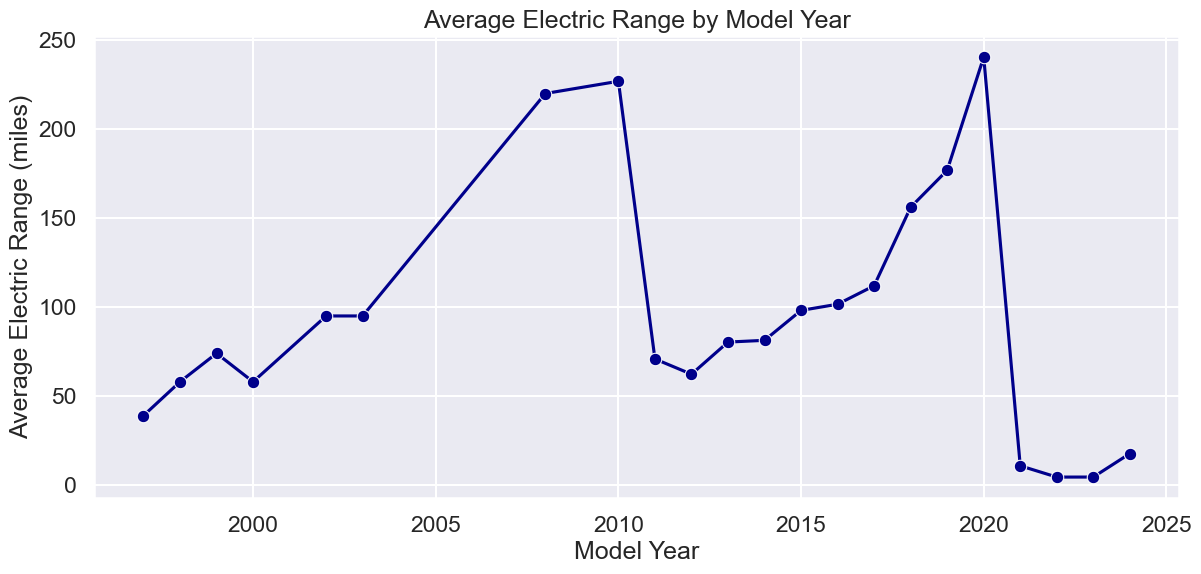

In [23]:
# calculating the average electric range by model year
average_range_by_year = Data_1.groupby('Model Year')['Electric Range'].mean().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(x='Model Year', y='Electric Range', data=average_range_by_year, marker='o', color='darkblue')
plt.title('Average Electric Range by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range (miles)')
plt.grid(True)
plt.show()

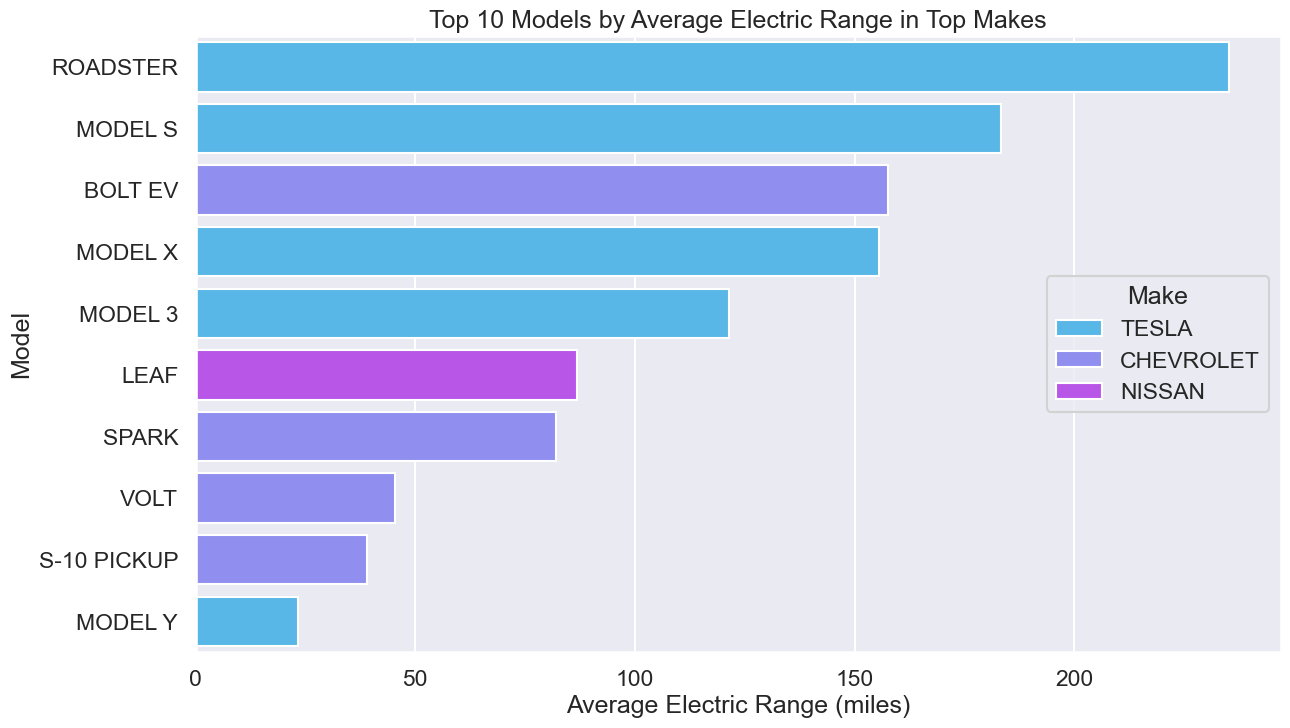

In [57]:
average_range_by_model = top_makes_data.groupby(['Make', 'Model'])['Electric Range'].mean().sort_values(ascending=False).reset_index()

# the top 10 models with the highest average electric range
top_range_models = average_range_by_model.head(10)

plt.figure(figsize=(14, 8))
barplot = sns.barplot(x='Electric Range', y='Model', hue='Make', data=top_range_models, palette="cool")
plt.title('Top 10 Models by Average Electric Range in Top Makes')
plt.xlabel('Average Electric Range (miles)')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')
plt.show()

In [26]:
# calculate the number of EVs registered each year
Ev_registration_counts = Data_1['Model Year'].value_counts().sort_index()
print(Ev_registration_counts)

Model Year
1997        1
1998        1
1999        4
2000        8
2002        2
2003        1
2008       18
2010       24
2011      795
2012     1630
2013     4555
2014     3598
2015     4919
2016     5632
2017     8549
2018    14407
2019    10693
2020    11263
2021    18610
2022    27733
2023    37052
2024      642
Name: count, dtype: int64


In [24]:
'''
x_data = Ev_registration_counts.index - Ev_registration_counts.index.min()
print(x_data)

'''

'\nx_data = Ev_registration_counts.index - Ev_registration_counts.index.min()\nprint(x_data)\n\n'

In [29]:
from scipy.optimize import curve_fit
import numpy as np

# filter the dataset to include years with complete data, assuming 2023 is the last complete year
filtered_years = Ev_registration_counts[Ev_registration_counts.index <= 2023]

# define a function for exponential growth to fit the data
def exp_growth(x, a, b):
    return a * np.exp(b * x)                       # f(x) = a x e^(bx)where e is the Euler's number (approximately equal to 2.71828). 

# prepare the data for curve fitting
x_data = filtered_years.index - filtered_years.index.min()
y_data = filtered_years.values

# fit the data to the exponential growth function
params, covariance = curve_fit(exp_growth, x_data, y_data)  #non-linear least squares method

# use the fitted function to forecast the number of EVs for 2024 and the next five years
forecast_years = np.arange(2024, 2024 + 6) - filtered_years.index.min()
forecasted_values = exp_growth(forecast_years, *params)


# create a dictionary to display the forecasted values for easier interpretation
forecasted_evs = dict(zip(forecast_years + filtered_years.index.min(), forecasted_values))

print(forecasted_evs)

{2024: 46514.920271163755, 2025: 60865.94177243381, 2026: 79644.6139485689, 2027: 104216.97826894453, 2028: 136370.5343153943, 2029: 178444.2701982258}


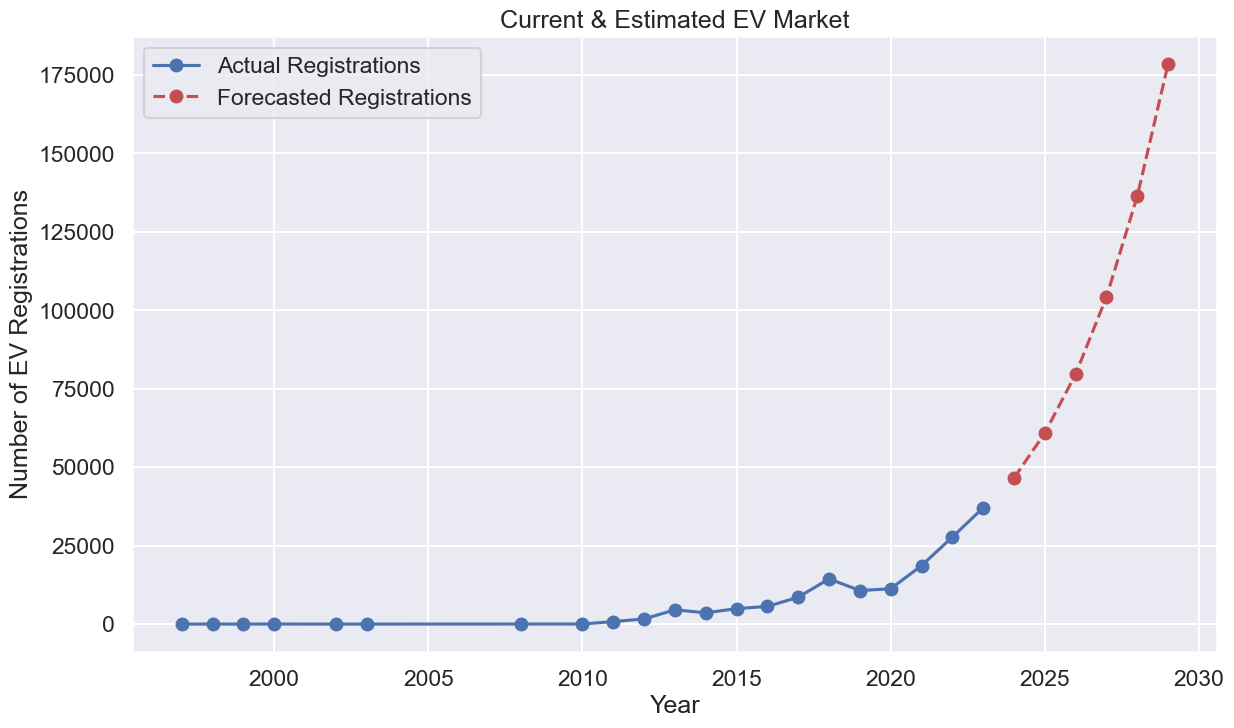

In [35]:
# prepare data for plotting
years = np.arange(filtered_years.index.min(), 2029 + 1)
actual_years = filtered_years.index
forecast_years_full = np.arange(2024, 2029 + 1)

# actual and forecasted values
actual_values = filtered_years.values
forecasted_values_full = [forecasted_evs[year] for year in forecast_years_full]

plt.figure(figsize=(14, 8))
plt.plot(actual_years, actual_values, 'bo-', label='Actual Registrations')
plt.plot(forecast_years_full, forecasted_values_full, 'ro--', label='Forecasted Registrations')

plt.title('Current & Estimated EV Market')
plt.xlabel('Year')
plt.ylabel('Number of EV Registrations')
plt.legend()
plt.grid(True)

plt.show()